In [1]:
   pip install pydlm

  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=59001 sha256=a2eebd265d2d187b524de28574af4dfbcb7d17c9f0665d80a69812ae0378ac95
  Stored in directory: c:\users\jayth\appdata\local\pip\cache\wheels\1d\fb\0c\6611fce0b9f3611ac6498dbddb7a9b5e67c09684acf6db285d
Successfully built pydlm
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [1240]:
df = pd.read_excel("TINSUKIA.xlsx")

In [1241]:
df.shape

(44, 27)

In [1244]:
df.head()

,STATE,DISTRICT,QTR,YR,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,...,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,Total Failure,SumOfHIV_Tested,SumOfHIV_infected
0,Assam,TINSUKIA,1,2008,132,67,199,38,41,6,...,9,28,4,3,2,2,1,2,0,0
1,Assam,TINSUKIA,2,2008,171,118,289,49,47,2,...,13,30,7,7,6,8,1,3,0,0
2,Assam,TINSUKIA,3,2008,220,107,327,81,68,5,...,16,40,9,14,5,2,1,5,22,0
3,Assam,TINSUKIA,4,2008,149,59,208,46,53,3,...,12,30,4,14,4,3,2,9,23,3
4,Assam,TINSUKIA,1,2009,139,88,227,70,35,4,...,10,21,5,7,2,2,3,9,30,1


In [1243]:
df.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [9]:
pred_date = pd.date_range(start = '1-1-2019' , end = '1-1-2026' , freq = 'Q')

In [1245]:
Agra_pred = pd.DataFrame(pred_date)

In [1191]:
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason

In [1246]:
nep_male = df['NEP Male']

In [1247]:
date = pd.date_range(start = '1-1-2008' , end = '1-1-2019' , freq = 'Q')

In [1248]:
nepMALE = dlm(nep_male)

In [1249]:
nepMALE = nepMALE + trend(1, name='lineTrend', w=1.0)

In [1250]:
nepMALE = nepMALE + seasonality(12, name='4qtr', w=1.0)

In [1251]:
nepMALE = nepMALE + autoReg(degree=3, data=nep_male, name='ar3', w=1.0)

C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [1252]:
nepMALE.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [1253]:
nepMALE_pred = nepMALE.predictN(N=28)

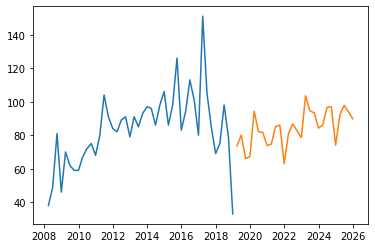

In [1254]:
plt.plot(date , nep_male)
plt.plot(pred_date , nepMALE_pred[0])

In [1255]:
import matplotlib.pyplot as plt

Agra_pred['NEP Male'] = nepMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


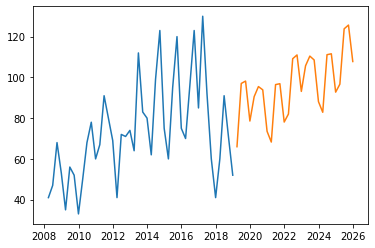

In [1256]:
nep_female = df['NEP Female']
nepFEMALE = dlm(nep_female)
nepFEMALE = nepFEMALE + trend(1, name='lineTrend', w=1.0  , discount=0.99)
nepFEMALE = nepFEMALE + seasonality(12, name='4qtr', w=1.0)
nepFEMALE = nepFEMALE + autoReg(degree=3, data=nep_female, name='ar3', w=1.0)
nepFEMALE.fit()
nepFEMALE_pred = nepFEMALE.predictN(N=28)
plt.plot(date , nep_female)
plt.plot(pred_date , nepFEMALE_pred[0])


In [1257]:
Agra_pred['NEP Female'] = nepFEMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


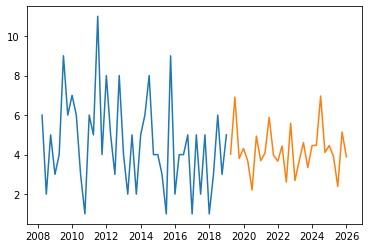

In [1258]:
ped_male = df['0-14 yrs NSP(NewAll207+) Male']
pedMALE = dlm(ped_male)
pedMALE = pedMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
pedMALE = pedMALE + seasonality(20, name='4qtr', w=1.0)
pedMALE = pedMALE + autoReg(degree=3, data=ped_male, name='ar3', w=1.0)
pedMALE.fit()
pedMALE_pred = pedMALE.predictN(N=28)
plt.plot(date , ped_male)
plt.plot(pred_date , pedMALE_pred[0])


In [1259]:
Agra_pred['Pediatric Male'] = pedMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


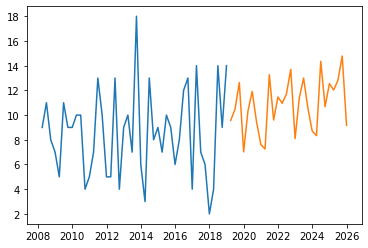

In [1260]:
ped_female = df['0-14 yrs NSP(NewAll207+) Female']
pedFEMALE = dlm(ped_female)
pedFEMALE = pedFEMALE + trend(1, name='lineTrend', w=1.0)
pedFEMALE = pedFEMALE + seasonality(12, name='4qtr', w=1.0)
pedFEMALE = pedFEMALE + autoReg(degree=3, data=ped_female, name='ar3', w=1.0)
pedFEMALE.fit()
pedFEMALE_pred = pedFEMALE.predictN(N=28)
plt.plot(date , ped_female)
plt.plot(pred_date , pedFEMALE_pred[0])


In [1261]:
Agra_pred['Pediatric Female'] = pedFEMALE_pred[0]


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


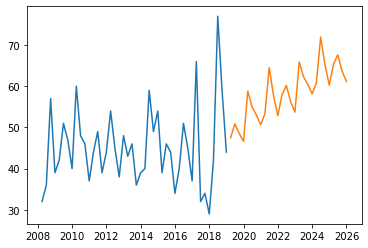

In [1262]:
male_15_24 = df['15-24 yrs NSP(NewAll207+) Male']
MALE1524 = dlm(male_15_24)
MALE1524 = MALE1524 + trend(1, name='lineTrend', w=1.0)
MALE1524 = MALE1524 + seasonality(12, name='4qtr', w=1.0)
MALE1524 = MALE1524 + autoReg(degree=3, data=male_15_24, name='ar3', w=1.0)
MALE1524.fit()
MALE1524_pred = MALE1524.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , MALE1524_pred[0])


In [1263]:
Agra_pred['15-24 Male'] = MALE1524_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


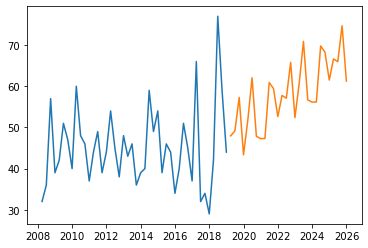

In [1264]:
female_15_24 = df['15-24 yrs NSP(NewAll207+) Female']
FEMALE1524 = dlm(female_15_24)
FEMALE1524 = FEMALE1524 + trend(1, name='lineTrend', w=1.0)
FEMALE1524 = FEMALE1524 + seasonality(12, name='4qtr', w=1.0)
FEMALE1524 = FEMALE1524 + autoReg(degree=3, data=female_15_24, name='ar3', w=1.0)
FEMALE1524.fit()
FEMALE1524_pred = FEMALE1524.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , FEMALE1524_pred[0])


In [1265]:
Agra_pred['15-24 Female'] = FEMALE1524_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


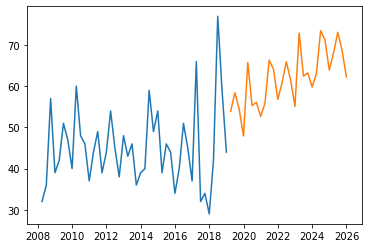

In [1266]:
male_25_34 = df['25-34 yrs NSP(NewAll207+) Male']
MALE2534 = dlm(male_25_34)
MALE2534 = MALE2534 + trend(1, name='lineTrend', w=1.0)
MALE2534 = MALE2534 + seasonality(12, name='4qtr', w=1.0)
MALE2534 = MALE2534 + autoReg(degree=3, data=male_25_34, name='ar3', w=1.0)
MALE2534.fit()
MALE2534_pred = MALE2534.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , MALE2534_pred[0])


In [1267]:
Agra_pred['25-34 Male'] = MALE2534_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


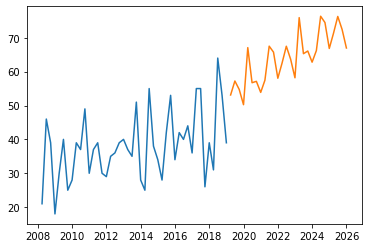

In [1268]:
female_25_34 = df['25-34 yrs NSP(NewAll207+) Male']
FEMALE2534 = dlm(female_25_34)
FEMALE2534 = FEMALE2534 + trend(1, name='lineTrend', w=1.0)
FEMALE2534 = FEMALE2534 + seasonality(12, name='4qtr', w=1.0)
FEMALE2534 = FEMALE2534 + autoReg(degree=5, data=female_25_34, name='ar3', w=1.0)
FEMALE2534.fit()
FEMALE2534_pred = FEMALE2534.predictN(N=28)
plt.plot(date , female_15_24)
plt.plot(pred_date , FEMALE2534_pred[0])


In [1269]:
Agra_pred['25-34 Female'] = FEMALE2534_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


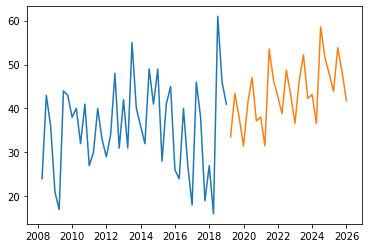

In [1270]:
male_35_44 = df['35-44 yrs NSP(NewAll207+) Male']
MALE3544 = dlm(male_35_44)
MALE3544 = MALE3544 + trend(1, name='lineTrend', w=1.0)
MALE3544 = MALE3544 + seasonality(12, name='4qtr', w=1.0)
MALE3544 = MALE3544 + autoReg(degree=3, data=male_35_44, name='ar3', w=1.0)
MALE3544.fit()
MALE3544_pred = MALE3544.predictN(N=28)
plt.plot(date , male_35_44)
plt.plot(pred_date , MALE3544_pred[0])


In [1271]:
Agra_pred['35-44 Male'] = MALE3544_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


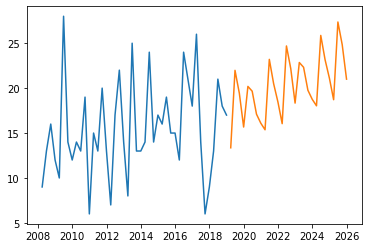

In [1272]:
female_35_44 = df['35-44 yrs NSP(NewAll207+) Female']
FEMALE3544 = dlm(female_35_44)
FEMALE3544 = FEMALE3544 + trend(1, name='lineTrend', w=1.0)
FEMALE3544 = FEMALE3544 + seasonality(12, name='4qtr', w=1.0)
FEMALE3544 = FEMALE3544 + autoReg(degree=3, data=female_35_44, name='ar3', w=1.0)
FEMALE3544.fit()
FEMALE3544_pred = FEMALE3544.predictN(N=28)
plt.plot(date , female_35_44)
plt.plot(pred_date , FEMALE3544_pred[0])


In [1273]:
Agra_pred['35-44 Female'] = FEMALE3544_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


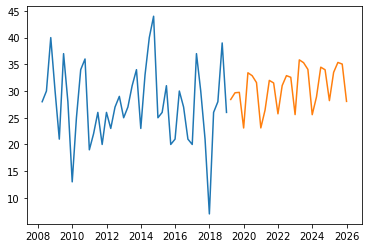

In [1274]:
male_45_54 = df['45-54 yrs NSP(NewAll207+) Male']
MALE4554 = dlm(male_45_54)
MALE4554 = MALE4554 + trend(1, name='lineTrend', w=1.0)
MALE4554 = MALE4554 + seasonality(12, name='4qtr', w=1.0)
MALE4554 = MALE4554 + autoReg(degree=3, data=male_45_54, name='ar3', w=1.0)
MALE4554.fit()
MALE4554_pred = MALE4554.predictN(N=28)
plt.plot(date , male_45_54)
plt.plot(pred_date , MALE4554_pred[0])


In [1275]:
Agra_pred['45-54 Male'] = MALE4554_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


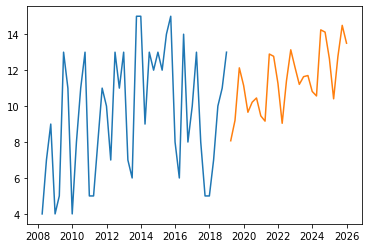

In [1276]:
female_45_54 = df['45-54 yrs NSP(NewAll207+) Female']
FEMALE4554 = dlm(female_45_54)
FEMALE4554 = FEMALE4554 + trend(1, name='lineTrend', w=1.0)
FEMALE4554 = FEMALE4554 + seasonality(12, name='4qtr', w=1.0)
FEMALE4554 = FEMALE4554 + autoReg(degree=3, data=female_45_54, name='ar3', w=1.0)
FEMALE4554.fit()
FEMALE4554_pred = FEMALE4554.predictN(N=28)
plt.plot(date , female_45_54)
plt.plot(pred_date , FEMALE4554_pred[0])


In [1277]:
Agra_pred['45-54 Female'] = FEMALE4554_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


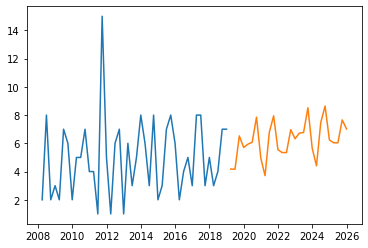

In [1278]:
ger_male = df['65 & above yrs NSP(NewAll207+) Male']
gerMALE = dlm(ger_male)
gerMALE = gerMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
gerMALE = gerMALE + seasonality(12, name='4qtr', w=1.0)
gerMALE = gerMALE + autoReg(degree=3, data=ger_male, name='ar3', w=1.0)
gerMALE.fit()
gerMALE_pred = gerMALE.predictN(N=28)
plt.plot(date , ger_male)
plt.plot(pred_date , gerMALE_pred[0])


In [1279]:
Agra_pred['Geriatric Male'] = gerMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


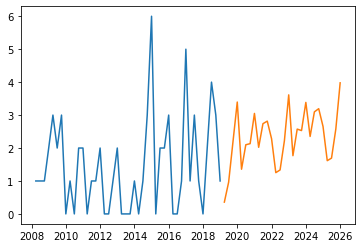

In [1280]:
ger_female = df['65 & above yrs NSP(NewAll207+) Female']
gerFEMALE = dlm(ger_female)
gerFEMALE = gerFEMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
gerFEMALE = gerFEMALE + seasonality(12, name='4qtr', w=1.0)
gerFEMALE = gerFEMALE + autoReg(degree=3, data=ger_female, name='ar3', w=1.0)
gerFEMALE.fit()
gerFEMALE_pred = gerFEMALE.predictN(N=28)
plt.plot(date , ger_female)
plt.plot(pred_date , gerFEMALE_pred[0])


In [1281]:
Agra_pred['Geriatric Female'] = gerFEMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


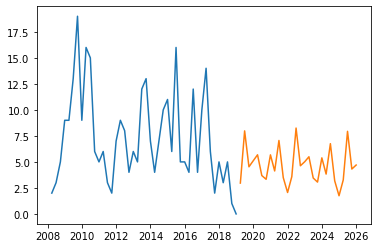

In [1282]:
failure = df['Total Failure']
FAILUREE = dlm(failure)
FAILUREE = FAILUREE + trend(1, name='lineTrend', w=1.0)
FAILUREE = FAILUREE + seasonality(12, name='4qtr', w=1.0)
FAILUREE = FAILUREE + autoReg(degree=3, data=failure, name='ar3', w=1.0)
FAILUREE.fit()
FAILUREE_pred = FAILUREE.predictN(N=28)
plt.plot(date , failure)
plt.plot(pred_date , FAILUREE_pred[0])


In [1283]:
Agra_pred['Total Failure'] = FAILUREE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


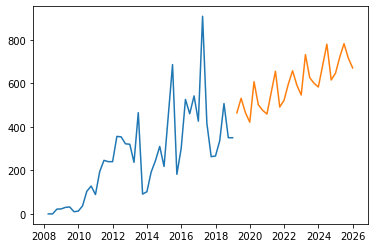

In [1284]:
hiv_test = df['SumOfHIV_Tested']
hivTEST = dlm(hiv_test)
hivTEST = hivTEST + trend(1, name='lineTrend', w=1.0, discount=0.99)
hivTEST = hivTEST + seasonality(12, name='4qtr', w=1.0)
hivTEST = hivTEST + autoReg(degree=3, data=hiv_test, name='ar3', w=1.0)
hivTEST.fit()
hivTEST_pred = hivTEST.predictN(N=28)
plt.plot(date , hiv_test)
plt.plot(pred_date , hivTEST_pred[0])


In [1285]:
Agra_pred['Tested for HIV'] = hivTEST_pred[0]

C:\ProgramData\Anaconda3\lib\site-packages\pydlm\modeler\autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


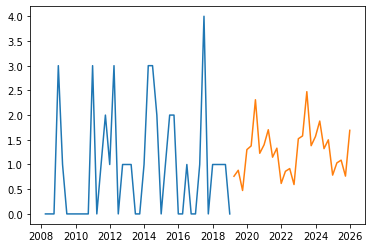

In [1286]:
hiv_infect = df['SumOfHIV_infected']
hivINFECT = dlm(hiv_infect)
hivINFECT = hivINFECT + trend(1, name='lineTrend', w=1.0, discount=0.99)
hivINFECT = hivINFECT + seasonality(12, name='4qtr', w=1.0)
hivINFECT = hivINFECT + autoReg(degree=3, data=hiv_infect, name='ar3', w=1.0)
hivINFECT.fit()
hivINFECT_pred = hivINFECT.predictN(N=28)
plt.plot(date , hiv_infect)
plt.plot(pred_date , hivINFECT_pred[0])


In [1287]:
Agra_pred['Infected for HIV'] = hivINFECT_pred[0]

In [1288]:
Agra_pred['STATE'] = 'Assam'

In [1289]:
Agra_pred['DISTRICT'] = 'Tinsukia'

In [1290]:
Agra_pred.rename(columns = {0 : 'Date'} , inplace = True)

In [1293]:
Agra_pred.to_csv('Downloads/TB/Assam/Prediction/Tinsukia_pred.csv' , index = False)

In [200]:
Agra_pred = Agra_pred[['Date', 'NEP Male', 'NEP Female','Pediatric Male',  'Pediatric Female',
       '15-24 Male', '15-24 Female', '25-34 Male', '25-34 Female',
       '35-44 Male', '35-44 Female', '45-54 Male', '45-54 Female',
       'Geriatric Male', 'Geriatric Female', 'Total Failure', 'Tested for HIV',
       'Infected for HIV', 'STATE', 'DISTRICT']]

In [1291]:
Agra_pred.head()

,Date,NEP Male,NEP Female,Pediatric Male,Pediatric Female,15-24 Male,15-24 Female,25-34 Male,25-34 Female,35-44 Male,35-44 Female,45-54 Male,45-54 Female,Geriatric Male,Geriatric Female,Total Failure,Tested for HIV,Infected for HIV,STATE,DISTRICT
0,2019-03-31,73.592303,65.982520,4.025054,9.569706,47.496479,47.956648,53.888096,53.104713,33.570794,13.359592,28.419608,8.070707,4.179444,0.358212,2.964624,463.976742,0.762038,Assam,Tinsukia
1,2019-06-30,80.066507,97.019019,6.910598,10.481305,50.848911,49.130922,58.416192,57.231615,43.407199,21.977799,29.674415,9.205432,4.163498,0.961485,7.980720,531.239587,0.882995,Assam,Tinsukia
2,2019-09-30,66.101856,98.184865,3.807667,12.633567,48.536326,57.291738,54.423833,54.747893,37.943708,19.441137,29.753892,12.128534,6.526912,2.181100,4.528410,464.942448,0.474056,Assam,Tinsukia
3,2019-12-31,67.137946,78.573483,4.313850,7.021859,46.605540,43.358320,47.922260,50.241111,31.479611,15.670214,23.086774,11.143469,5.705970,3.395613,5.112639,421.402131,1.301133,Assam,Tinsukia
4,2020-03-31,94.432338,90.537947,3.670556,10.304737,58.790370,51.709188,65.774569,67.080860,41.234880,20.190003,33.419225,9.657681,5.939213,1.356611,5.682439,607.259429,1.376190,Assam,Tinsukia


In [1292]:
Agra_pred.shape

(28, 20)